In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully")

Libraries imported successfully


In [3]:
# 2.Load and explore the data

try:
  df = pd.read_csv('Mall_Customers.csv')
  print("Data 'Mall_Customers.csv' loaded successfully")
  print(f"Dataset shape : {df.shape}")
except FileNotFoundError:
  print("Error: 'Mall_Customers.csv'not found.")
  print("Please upload the file to colab enviroment")
  exit()

print("\n--- Data Exploration ---")
print(df.head())
df.info()


Data 'Mall_Customers.csv' loaded successfully
Dataset shape : (200, 5)

--- Data Exploration ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: i

In [5]:
# 3.Data Preprocessing
# For this analysis, we will focus on 'Annual Income' and 'Spending Score'.
# These two features are most likely to reveal interesting purchasing behaviors.

X = df[['Annual Income (k$)','Spending Score (1-100)']]
print(X.head())

# CRITICAL STEP: Scale the data.
# K-Means is a distance-based algorithm. If features are on different scales,
# the feature with the larger scale will dominate the clustering process.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('\n --- Sample of Scaled Data ---')
print(X_scaled[:5])





   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

 --- Sample of Scaled Data ---
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


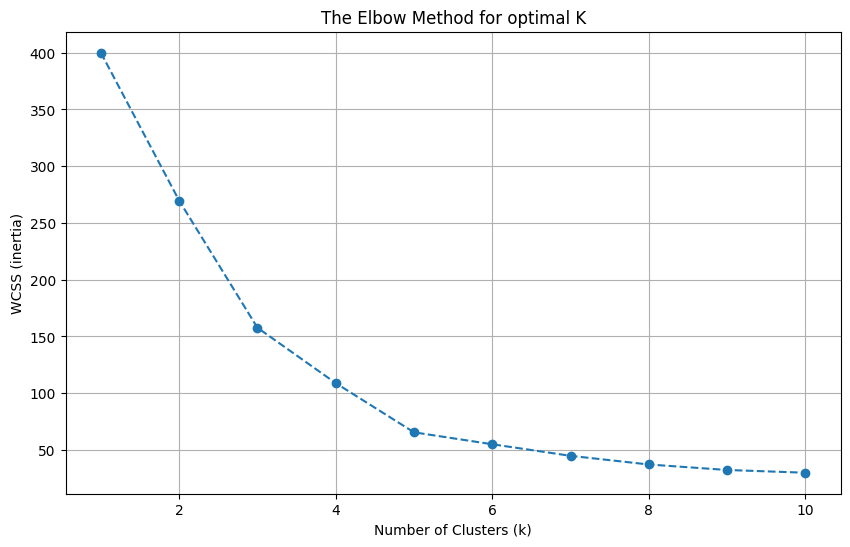


--- Analysis of Elbow Method ---
The plot shows a distinct 'elbow' at k=5.After this point ,the decrease in wcss become much less significant 
Therefore , the optimal number of cluster is 5.


In [7]:
# --- 4. Finding the Optimal Number of Clusters (The Elbow Method) ---
# We calculate the Within-Cluster-Sum-of-Squares (WCSS) for a range of k values.
# The "elbow" point on the plot suggests the optimal number of clusters.

wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k , init='k-means++',random_state=42,n_init=10)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_) # intertia_ is the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title('The Elbow Method for optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (inertia)')
plt.grid(True)
plt.show()

print("\n--- Analysis of Elbow Method ---")
print("The plot shows a distinct 'elbow' at k=5.After this point ,the decrease in wcss become much less significant ")
print("Therefore , the optimal number of cluster is 5.")

In [8]:
# 5. Building the K-Means Models
OPTIMAL_K = 5
kmeans = KMeans(n_clusters=OPTIMAL_K,init='k-means++',random_state=42,n_init=10)
# Fit the model and predict the cluster for each data points
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels back to the original dataframe
df['Segment'] = cluster_labels
print(f'\n K-means modell with k={OPTIMAL_K} trained and segments assigned')
df.head()


 K-means modell with k=5 trained and segments assigned


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Segment
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


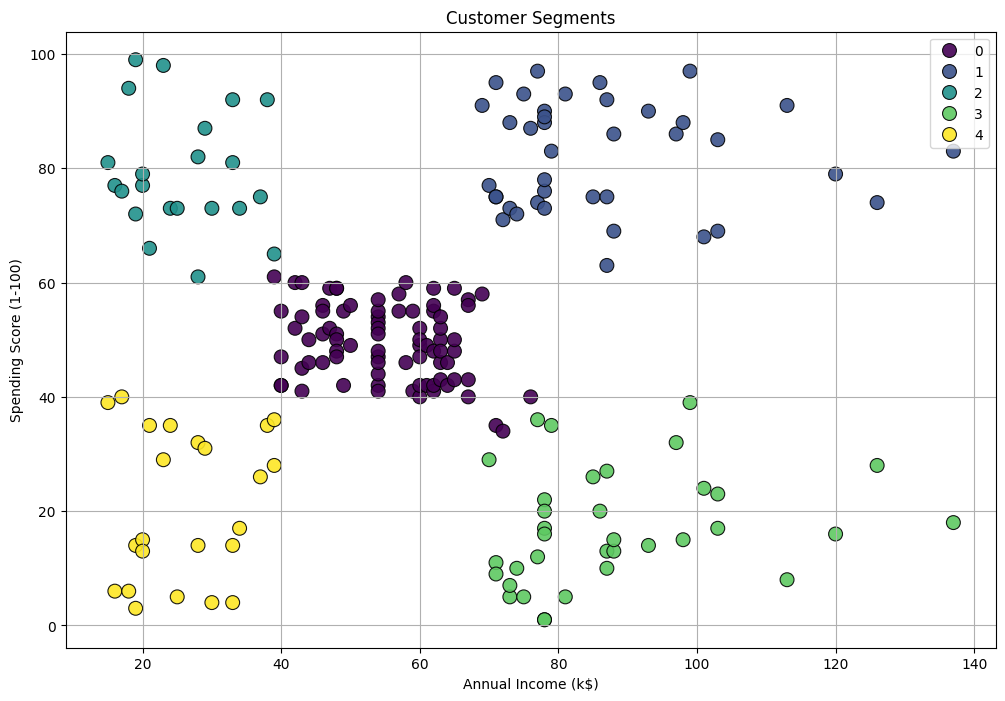

In [9]:
# 6.Visualizing the segments
# We can directly plot our two features since we only used two.
# If we had used more features, we would apply PCA here before plotting.

plt.figure(figsize=(12,8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Segment',
                data=df, palette='viridis', s=100, alpha=0.9, edgecolor='k')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# 7.Interpreting the customer segments
# this is the most crucial part: turning the clusters into actionable business insights
print("\n--- Analysis of Customer Segments ---")
segment_analysis = df.groupby('Segment')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(2)
print(segment_analysis)

print("\n--- Segment Personas ---")
print("Segment 0: STANDARD - Average income, average spending.")
print("Segment 1: TARGET - High income, high spending. (Prime customers)")
print("Segment 2: CAREFUL - High income, but low spending. (Potential customers to target with specific promotions)")
print("Segment 3: SENSIBLE - Low income, low spending.")
print("Segment 4: CARELESS - Low income, but high spending. (Could be targeted with budget-friendly offers)")



--- Analysis of Customer Segments ---
           Age  Annual Income (k$)  Spending Score (1-100)
Segment                                                   
0        42.72               55.30                   49.52
1        32.69               86.54                   82.13
2        25.27               25.73                   79.36
3        41.11               88.20                   17.11
4        45.22               26.30                   20.91

--- Segment Personas ---
Segment 0: STANDARD - Average income, average spending.
Segment 1: TARGET - High income, high spending. (Prime customers)
Segment 2: CAREFUL - High income, but low spending. (Potential customers to target with specific promotions)
Segment 3: SENSIBLE - Low income, low spending.
Segment 4: CARELESS - Low income, but high spending. (Could be targeted with budget-friendly offers)
